# Week 4: Clustering

## Sources
- [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)
- [k-means Clustering](https://en.wikipedia.org/wiki/K-means_clustering)
- [Andrew Moore's k-means Clustering Notes](https://www.autonlab.org/_media/tutorials/kmeans11.pdf)
- [Andrew Ng's k-means Clustering Notes](https://github.com/andrewxiechina/DataScience/blob/master/K-Means/cs229-notes7a%202.pdf)
- [An Introduction to Clustering Algorithms in Python](https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097)
- [A Gentle Introduction to k-fold Cross-Validation](https://machinelearningmastery.com/k-fold-cross-validation/)

## Rob Pike's 5 Rules of Programming

These are the rules to know by heart when you are starting to write any code:

1. You can't tell where a program is going to spend its time. Bottlenecks occur in surprising places, so don't try to second guess and put in a speed hack until you've proven that's where the bottleneck is.
1. Measure. Don't tune for speed until you've measured, and even then don't unless one part of the code overwhelms the rest.
1. Fancy algorithms are slow when n is small, and n is usually small. Fancy algorithms have big constants. Until you know that n is frequently going to be big, don't get fancy. (Even if n does get big, use Rule 2 first.)
1. Fancy algorithms are buggier than simple ones, and they're much harder to implement. Use simple algorithms as well as simple data structures.
1. Data dominates. If you've chosen the right data structures and organized things well, the algorithms will almost always be self-evident. Data structures, not algorithms, are central to programming.

## k-means Clustering: A primer in Expectation-maximization

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science. k-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here. In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
1. Repeat until converged
    - E-Step: assign points to the nearest cluster center
    - M-Step: set the cluster centers to the mean

Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to. The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

Let's implement it.

In [571]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn context and style.
sns.set_style('whitegrid')
sns.set_context('talk')

We need a dataset that we know how many clusters there are and well-separated for implementing this algorithm. You should see 5 blobs in 2 dimensions below.

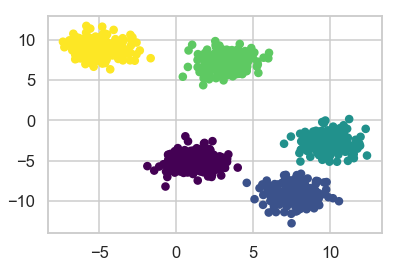

In [730]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, n_features=2, centers=5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

### Q1. As explained above k-means requires guessed cluster centers to get started. Implement a function that takes a set of points and k and returns k random points in the range of the set of points. Generate 5 points for the generated dataset and plot together.

In [731]:
def generate_centroids(X, k):
    
    n, dim = X.shape
    
    mx = X.max(axis=0)
    mn = X.min(axis=0)
    centroid = []
    
    for i in range(k):
        
        centroid_point = (mx - mn) * np.random.uniform(size = X.shape[1]) + mn
        centroid.append(centroid_point)
        
    centroids = np.array(centroid)

    return centroids

The randomly generated centroids are:  
 [[  9.71298983 -11.47624155]
 [ -6.8104274   -2.77380352]
 [  7.3357598    9.73837815]
 [ -2.93141108   8.6913533 ]
 [  0.59732085   8.16156038]]


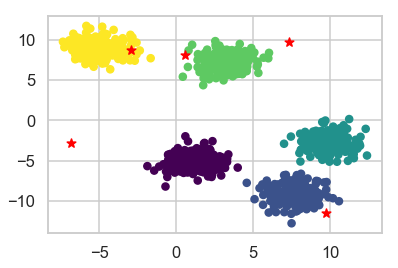

In [732]:
central_points = generate_centroids(X, 5)
print("The randomly generated centroids are: ", "\n", central_points)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.scatter(central_points[:, 0], central_points[:, 1], marker = '*', color = 'r')

### Q2. Similar to kNN, k-means works with a distance function. Implement a function that takes a set of data points and a point and gives the Euclidean distance between them as an array.

In [748]:
import math

def distances(points, a_point): 
    """Return an array of the distances of the given points (NumPy arrays) from a fixed point."""
    distances = []
    for point in points:
        d = math.sqrt(sum((point - a_point) ** 2))
        distances.append(d)
    distances = np.array(distances)   
    
    return distances

### Q3. Using the distance function you implemented in Q2, for every point in the dataset, implement a function that finds the index of the closest randomly generated center point. Use the function to get labels and plot the blobs with labels. This is the E-step.

In [749]:
def get_labels(datapoints, centroids):
    
    """Given a collection of data points and a collection of centroid points, return an array providing a label
    for each datapoint that indicates which centroid (by index) it is closest to."""

    labels = []
    
    for datapoint in datapoints:
        
        array_distance = distances(centroids, datapoint)
        sort_distance = np.argsort(array_distance)
        closest_centroid = sort_distance[0]
        labels.append(closest_centroid)
    
    return labels

In [750]:
print("The labels are: ", get_labels(X, central_points))

The labels are:  [4, 0, 0, 0, 0, 0, 3, 4, 0, 0, 3, 3, 0, 1, 3, 0, 0, 0, 0, 0, 3, 3, 1, 0, 0, 0, 2, 4, 0, 0, 3, 0, 0, 4, 3, 2, 0, 1, 0, 3, 1, 1, 0, 1, 3, 3, 2, 4, 0, 0, 3, 0, 4, 1, 0, 1, 0, 3, 0, 0, 0, 4, 0, 0, 0, 4, 3, 0, 3, 1, 4, 0, 4, 1, 1, 1, 4, 0, 1, 0, 0, 3, 1, 0, 0, 0, 4, 4, 3, 3, 2, 0, 1, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 4, 0, 4, 1, 3, 3, 3, 4, 3, 0, 1, 0, 1, 1, 4, 4, 4, 1, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 3, 2, 3, 0, 4, 0, 3, 0, 3, 0, 1, 4, 3, 4, 1, 1, 4, 0, 4, 1, 0, 0, 3, 1, 1, 4, 3, 1, 4, 3, 4, 0, 4, 1, 3, 1, 4, 0, 0, 3, 0, 0, 0, 4, 0, 3, 0, 0, 0, 3, 0, 3, 4, 4, 0, 4, 4, 0, 1, 1, 1, 0, 3, 4, 0, 4, 0, 3, 1, 4, 3, 0, 3, 3, 0, 1, 0, 4, 3, 3, 1, 0, 4, 0, 0, 0, 0, 3, 0, 0, 4, 3, 4, 4, 4, 4, 0, 3, 4, 0, 0, 3, 4, 3, 0, 3, 4, 4, 4, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 4, 3, 1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 3, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 2, 4, 0, 0, 1, 3, 0, 4, 0, 4, 0, 3, 0, 1, 3, 4, 0, 1, 3, 1, 1, 4, 0, 0, 3, 3, 0, 0, 0, 1, 3, 3, 3, 4, 0, 0, 0, 0, 3, 4, 0, 1, 3, 0

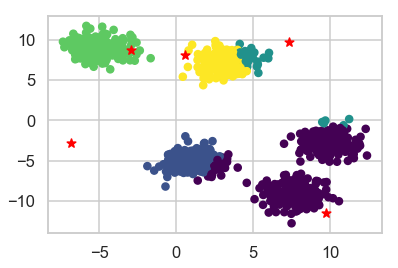

In [751]:
plt.scatter(X[:, 0], X[:, 1], c = get_labels(X, central_points), s=50, cmap='viridis')
plt.scatter(central_points[:, 0], central_points[:, 1], marker = '*', c = "r")

### Q4. We need to update centroids, this is the M-step. Implement a function that takes the dataset, labels, and k. This function should return the new centroid.

In [752]:
def get_centroids(X, labels, k):
    """Given the points and their current labels, return an improved set of centroids."""
    new_centroids = []
    for subset in range(0,k):
        # Inside this loop, only need to consider 1 of the clusters with label == subset
        lis = []
        for i in range(0, len(labels)):
            # Inside of this loop, only need to consider one point and it's label
            a_point = X[i]
            a_label = labels[i]
            if a_label == subset:
                lis.append(a_point)
        if len(lis) > 1:
            new_centroid = np.mean(lis, axis = 0)
        else:
            new_centroid = generate_centroids(X,1)[0]
        new_centroids.append(new_centroid)
        
    new_centroids = np.array(new_centroids)
    return new_centroids

In [753]:
new_centroids = get_centroids(X, get_labels(X, central_points), 5)
new_centroids

array([[ 8.41019645, -6.04734779],
       [ 0.87654325, -4.92080746],
       [ 5.55625009,  6.67553699],
       [-4.97396755,  8.93978787],
       [ 3.02720163,  7.11533303]])

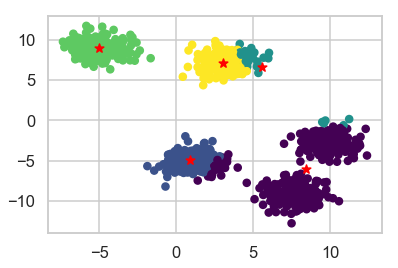

In [754]:
plt.scatter(X[:, 0], X[:, 1], c = get_labels(X, central_points), s=50, cmap='viridis')
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], marker = '*', c = "r")

### Q5. Run get_labels and get_centroids in sequence for 3 more times. Plot the resulting centeroids on blobs.

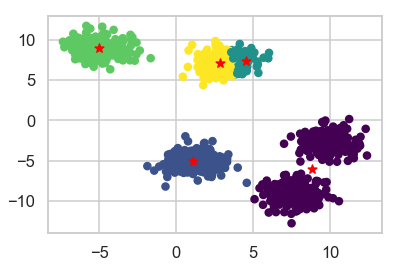

In [822]:
# improve the central points several times to find the correct centroids
improved_centroids = central_points
labels = get_labels(X, improved_centroids)

for time in range(3):
    improved_centroids = get_centroids(X, labels, 5)
    labels = get_labels(X, improved_centroids)
    
plt.scatter(X[:, 0], X[:, 1], c = labels, s=50, cmap='viridis')
plt.scatter(improved_centroids[:, 0], improved_centroids[:, 1], marker = '*', c = "r")

### Q6. Implement k-means function. It should stop when centroids are not moving or 500 iterations reached. Plot the resulting centroids with blobs.

In [817]:
def k_means(X, k, max_iterations=500):
    
    centroids = generate_centroids(X, k)
    labels = get_labels(X, centroids)
    
    for time in range(max_iterations):
        previous = centroids
        centroids = get_centroids(X, labels, k)
        labels = get_labels(X, centroids)
        if np.array_equal(previous, centroids):
            break        
    print("The centroids are not moving after we run",time,"times")
    return labels, centroids

#### k = 5

The centroids are not moving after we run 13 times


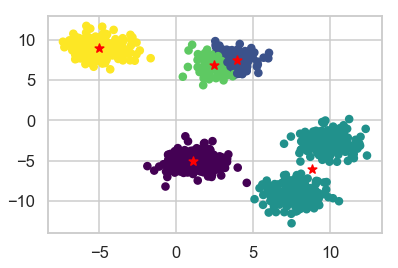

In [845]:
labels, centroids = k_means(X, 5, max_iterations=500)

plt.scatter(X[:, 0], X[:, 1], c = labels , s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker = '*', c = "r")

#### k = 2

The centroids are not moving after we run 1 times


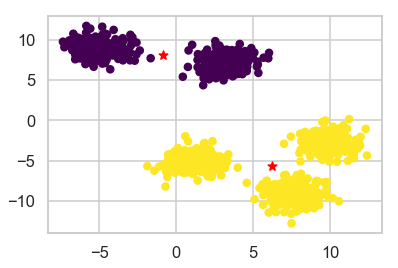

In [851]:
labels, centroids = k_means(X, 2, max_iterations=500)

plt.scatter(X[:, 0], X[:, 1], c = labels , s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker = '*', c = "r")

### Q7. Compare your k-means clusters to original clusters. Describe your findings.

Each blob has a center, called the centroid, and each data point is clustered into a certain blob based on how close the data point is to the centroids. The first step in the **k-means** algorithm is to randomly generate initial centroids. The **k-means** algorithm may divide an original blob into two different clusters with two centroids. Or the algorithm might combine two of the original blobs into one cluster with one centroid. For instance, originally the middle top blob is one cluster. The **k-means** algorithm in this case, divided the original blob into two clusters with two centroids. This can happen because we randomly generated the initial centroids and several of those centroids might have been generated inside the same blob.

### Q8. Run your k-means function on the dataset below and plot. Comment on what happened. Why do you think it happened?

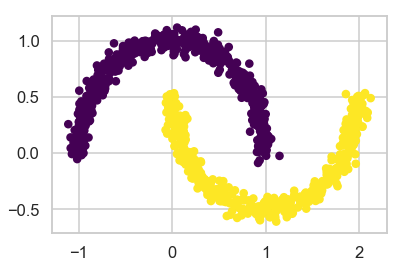

In [833]:
from sklearn.datasets import make_moons

X1, y1 = make_moons(n_samples=1000, shuffle=True, noise=0.05, random_state=None)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='viridis')

The centroids are not moving after we run 13 times


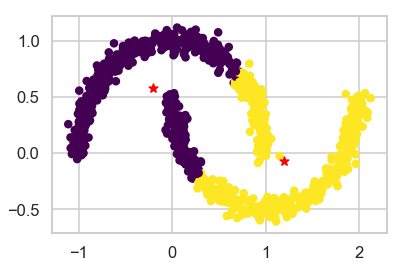

In [855]:
labels1, centroids1 = k_means(X1, 2, max_iterations=500)

plt.scatter(X1[:, 0], X1[:, 1], c=labels1, s=50, cmap='viridis')
plt.scatter(centroids1[:, 0], centroids1[:, 1], marker = '*', c = "r")

The centroids are not moving after we run 17 times


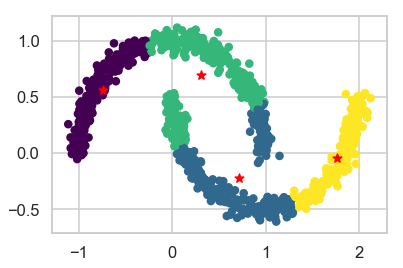

In [856]:
labels1, centroids1 = k_means(X1, 4, max_iterations=500)

plt.scatter(X1[:, 0], X1[:, 1], c=labels1, s=50, cmap='viridis')
plt.scatter(centroids1[:, 0], centroids1[:, 1], marker = '*', c = "r")

**k-means** finds better centroids when the clusters are well-seperated; because the clusters are not well-seperated in this case, k-means finds poor centroids. For example when there are two distinct inital clusers, for the datapoints which are labeled yellow color, it shows 2 subsets are all at the same cluster and one of the subsets is connected to purple points. The centroids found by k-means are definitely not very good. When I increase the k value, k-means continues to find poor centroids. k-means is not suitable for data points where the blobs are not well-seperated.

**k-means** gives reliable results when clusters are distinct or well-separated from each other. It is best used when the number of cluster centers, is specified due to a well-defined list of types shown in the data. However, it is important to keep in mind that k-means clustering may not perform well if the clusters are not well-seperated.